In [ ]:
#Member 1 – Data Collection & Simulation

!pip install google-play-scraper pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.8 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import reviews
import pandas as pd

result, _ = reviews(
    'com.whatsapp',
    lang='en',
    count=50
)

df = pd.DataFrame(result)
df = df[['content', 'score']]
df.head()


,content,score
0,they blocked my friends number for no reason. ...,1
1,best app for chatting with gf,5
2,"Bro Mark, we appreciate all you're doing. Plea...",5
3,"Good, but connectivity has been my problems fo...",4
4,five star,5


In [ ]:
df.to_csv("reviews.csv", index=False)


In [ ]:
import pandas as pd
df = pd.read_csv("reviews.csv")
df.head()


,content,score
0,they blocked my friends number for no reason. ...,1
1,best app for chatting with gf,5
2,"Bro Mark, we appreciate all you're doing. Plea...",5
3,"Good, but connectivity has been my problems fo...",4
4,five star,5


In [ ]:
import time

for i in range(len(df)):
    print(f"Review {i+1}: {df.loc[i, 'content']}")
    time.sleep(2)


Review 1: they blocked my friends number for no reason. if there is a 0 star I would pick it.
Review 2: best app for chatting with gf
Review 3: Bro Mark, we appreciate all you're doing. Please help return WhatsApp status to 1 min view😩
Review 4: Good, but connectivity has been my problems for almost a month now
Review 5: five star
Review 6: Sajjad khan
Review 7: Excellent
Review 8: I don't know what happened my WhatsApp is not working day put ban on one out 2 one day ask me take download official WhatsApp please help me out I love WhatsApp my two WhatsApp account is not working
Review 9: easy and understandable
Review 10: Ajli yusf Ahmed
Review 11: Better as Beta 😀
Review 12: not installing in my phone, why
Review 13: nice app
Review 14: what's up how it's happenin' every body
Review 15: good
Review 16: Great in most aspects but suddenly I have horrible loud sounds when pressing the voice note button and as someone with sensitive ears this is driving me mad, why is there no option to t

In [ ]:
# Member 2 – Text Preprocessing & Cleaning
!pip install nltk spacy emoji --quiet

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

import spacy
spacy.cli.download("en_core_web_sm")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 10.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import re
import string
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [ ]:
# Load reviews.csv (make sure it's uploaded or in the same directory)
df = pd.read_csv('reviews.csv')  # Provided by Member 1
df = df[['content']]  # Keep only review column
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()


,content
0,they blocked my friends number for no reason. ...
1,best app for chatting with gf
2,"Bro Mark, we appreciate all you're doing. Plea..."
3,"Good, but connectivity has been my problems fo..."
4,five star


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = emoji.replace_emoji(text, replace='')
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    text = re.sub(r"\d+", "", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)


In [ ]:
df['cleaned_content'] = df['content'].apply(clean_text)
df.to_csv('cleaned_reviews.csv', index=False)

In [ ]:
df[['content', 'cleaned_content']].head(10)


,content,cleaned_content
0,they blocked my friends number for no reason. ...,blocked friend number reason star would pick
1,best app for chatting with gf,best app chatting
2,"Bro Mark, we appreciate all you're doing. Plea...",bro mark appreciate please help return whatsap...
3,"Good, but connectivity has been my problems fo...",good connectivity problem almost month
4,five star,five star
5,Sajjad khan,sajjad khan
6,Excellent,excellent
7,I don't know what happened my WhatsApp is not ...,know happened whatsapp working day put ban one...
8,easy and understandable,easy understandable
9,Ajli yusf Ahmed,ajli yusf ahmed


In [ ]:
# Member 3: Sentiment Analysis

import pandas as pd
df = pd.read_csv('/content/cleaned_reviews.csv')
print(df.columns)


Index(['content', 'cleaned_content'], dtype='object')


In [ ]:
import pandas as pd
df = pd.read_csv('/content/cleaned_reviews.csv')


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df['cleaned_content'] = df['cleaned_content'].fillna('')

def get_sentiment(text):
    score = sid.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['cleaned_content'].apply(get_sentiment)
print(df.head())


                                             content  \
0  they blocked my friends number for no reason. ...   
1                      best app for chatting with gf   
2  Bro Mark, we appreciate all you're doing. Plea...   
3  Good, but connectivity has been my problems fo...   
4                                          five star   

                                     cleaned_content Sentiment  
0       blocked friend number reason star would pick  Positive  
1                                  best app chatting  Positive  
2  bro mark appreciate please help return whatsap...  Positive  
3             good connectivity problem almost month  Positive  
4                                          five star   Neutral  


In [ ]:
print(df['Sentiment'].value_counts())


Sentiment
Positive    24
Neutral     20
Negative     6
Name: count, dtype: int64


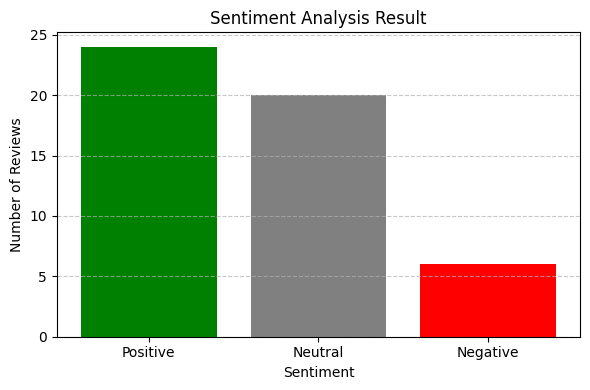

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
plt.title('Sentiment Analysis Result')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv('/content/final_sentiment_output.csv', index=False)


In [ ]:
#MEMBER 4 – Model Training & Output Generation

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("final_sentiment_output.csv")
df['label'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0})
df.dropna(subset=['label'], inplace=True) # Drop rows where label is NaN (Neutral sentiment)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_content'], df['label'], test_size=0.2, random_state=42
)


In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.fillna(''))
X_test_vec = vectorizer.transform(X_test.fillna(''))

In [ ]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_vec)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Confusion Matrix:
[[6]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
df_test = pd.DataFrame({
    "content": X_test.values,
    "cleaned_content": X_test.values,
    "actual_sentiment": y_test.values,
    "predicted_sentiment": y_pred
})


In [ ]:
label_map = {0: "Negative", 1: "Positive"}
df_test['actual_sentiment'] = df_test['actual_sentiment'].map(label_map)
df_test['predicted_sentiment'] = df_test['predicted_sentiment'].map(label_map)

In [ ]:
df_test.to_csv("model_output.csv", index=False)
print("model_output.csv saved successfully.")

model_output.csv saved successfully.


In [ ]:
#MEMBER 5 – Streamlit Dashboard

!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sentiment_df = pd.read_csv("final_sentiment_output.csv")
model_df = pd.read_csv("model_output.csv")

In [ ]:
st.title("Sentiment Analysis Dashboard")

tab1, tab2, tab3 = st.tabs(["📊 Review Data", "🔍 Sentiment Insights", "🤖 Model Predictions"])


2025-06-30 20:06:28.816 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:29.150 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-30 20:06:29.154 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:29.158 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:29.160 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:29.163 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:29.165 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:29.169 Thread 'MainThread': mi

In [ ]:
with tab1:
    st.header("Raw Reviews with Sentiment")
    sentiment_filter = st.selectbox("Filter by Sentiment", ["All", "Positive", "Negative"])
    if sentiment_filter != "All":
        st.dataframe(sentiment_df[sentiment_df["Sentiment"] == sentiment_filter])
    else:
        st.dataframe(sentiment_df)


2025-06-30 20:06:31.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:31.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:31.063 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:31.064 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:31.065 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:31.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:31.068 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:31.069 Session state does not function when running a script without `streamlit run`
2025-06-30 20:06

2025-06-30 20:06:33.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:33.417 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:33.420 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:33.500 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:33.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:33.830 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:33.832 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


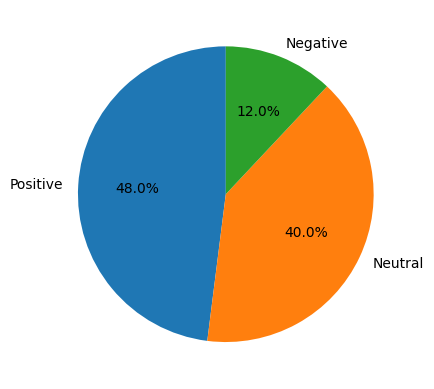

In [ ]:
with tab2:
    st.header("Sentiment Distribution")
    counts = sentiment_df["Sentiment"].value_counts()
    fig, ax = plt.subplots()
    ax.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=90)
    st.pyplot(fig)


In [ ]:
with tab3:
    st.header("Model Predictions vs Actual")
    st.dataframe(model_df)

    chart_data = model_df.groupby(["actual_sentiment", "predicted_sentiment"]).size().unstack(fill_value=0)
    st.subheader("Confusion Matrix")
    st.bar_chart(chart_data)


2025-06-30 20:06:36.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:36.076 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:36.077 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:36.090 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:36.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:36.094 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:36.137 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 20:06:36.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
get_ipython().system('streamlit run app.py')

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
